#      Task 3 — Time Series Forecasting

## ️ Problem Statement

Energy consumption forecasting is crucial for efficient power management and
grid stability. In this task, we aim to analyze historical energy consumption
data and build a time series forecasting model to predict future energy usage.

# Objective


Objective:
- Analyze historical energy consumption trends
- Perform time series preprocessing
- Visualize consumption patterns
- Build a forecasting model (ARIMA or Prophet)
- Predict future energy consumption


## Libraries Import

In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Models
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Dataset Load

In [3]:
# Load dataset
df = pd.read_csv("C:/Users/Aqsaamalik/Desktop/DataScience&AnalystInternship/household_power_consumption.csv")
df.head()


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0


In [4]:
print(df.columns)


Index(['index', 'Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [5]:
df['Date']

0            1/1/07
1            1/1/07
2            1/1/07
3            1/1/07
4            1/1/07
            ...    
260635    30/6/2007
260636    30/6/2007
260637    30/6/2007
260638    30/6/2007
260639    30/6/2007
Name: Date, Length: 260640, dtype: object

## 1️. Parse and Resample the Time Series Data
##### Step 1. Convert into DataTime

In [6]:
import pandas as pd

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # dayfirst=True for 'dd/mm/yy'

# Check conversion
print(df['Date'].head())


0   2007-01-01
1   2007-01-01
2   2007-01-01
3   2007-01-01
4   2007-01-01
Name: Date, dtype: datetime64[ns]


### Set the Date column as the index

In [7]:
df.reset_index(inplace=True)

In [8]:
print(df.head())

   level_0  index       Date     Time Global_active_power  \
0        0      0 2007-01-01  0:00:00                2.58   
1        1      1 2007-01-01  0:01:00               2.552   
2        2      2 2007-01-01  0:02:00                2.55   
3        3      3 2007-01-01  0:03:00                2.55   
4        4      4 2007-01-01  0:04:00               2.554   

  Global_reactive_power Voltage Global_intensity Sub_metering_1  \
0                 0.136  241.97             10.6              0   
1                   0.1  241.75             10.4              0   
2                   0.1  241.64             10.4              0   
3                   0.1  241.71             10.4              0   
4                   0.1  241.98             10.4              0   

  Sub_metering_2  Sub_metering_3  
0              0             0.0  
1              0             0.0  
2              0             0.0  
3              0             0.0  
4              0             0.0  


### Step2. Convert Time to timedelta

In [11]:
df['Time'] = pd.to_timedelta(df['Time'])

#### Add Date + Time Properly

In [12]:
df['Datetime'] = df['Date'] + df['Time']

In [13]:
print(df.head())

   level_0  index       Date            Time Global_active_power  \
0        0      0 2007-01-01 0 days 00:00:00                2.58   
1        1      1 2007-01-01 0 days 00:01:00               2.552   
2        2      2 2007-01-01 0 days 00:02:00                2.55   
3        3      3 2007-01-01 0 days 00:03:00                2.55   
4        4      4 2007-01-01 0 days 00:04:00               2.554   

  Global_reactive_power Voltage Global_intensity Sub_metering_1  \
0                 0.136  241.97             10.6              0   
1                   0.1  241.75             10.4              0   
2                   0.1  241.64             10.4              0   
3                   0.1  241.71             10.4              0   
4                   0.1  241.98             10.4              0   

  Sub_metering_2  Sub_metering_3            Datetime  
0              0             0.0 2007-01-01 00:00:00  
1              0             0.0 2007-01-01 00:01:00  
2              0       

#### Set index

In [14]:
df.set_index('Datetime', inplace=True)

#### Drop Old Columns

In [15]:
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [16]:
print(df.head())
print(df.index)

                     level_0  index Global_active_power Global_reactive_power  \
Datetime                                                                        
2007-01-01 00:00:00        0      0                2.58                 0.136   
2007-01-01 00:01:00        1      1               2.552                   0.1   
2007-01-01 00:02:00        2      2                2.55                   0.1   
2007-01-01 00:03:00        3      3                2.55                   0.1   
2007-01-01 00:04:00        4      4               2.554                   0.1   

                    Voltage Global_intensity Sub_metering_1 Sub_metering_2  \
Datetime                                                                     
2007-01-01 00:00:00  241.97             10.6              0              0   
2007-01-01 00:01:00  241.75             10.4              0              0   
2007-01-01 00:02:00  241.64             10.4              0              0   
2007-01-01 00:03:00  241.71             10

#### Remove Extra Columns

In [17]:
df.drop(['level_0', 'index'], axis=1, inplace=True)

In [18]:
print(df.columns)

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [19]:
print(df.index)

DatetimeIndex(['2007-01-01 00:00:00', '2007-01-01 00:01:00',
               '2007-01-01 00:02:00', '2007-01-01 00:03:00',
               '2007-01-01 00:04:00', '2007-01-01 00:05:00',
               '2007-01-01 00:06:00', '2007-01-01 00:07:00',
               '2007-01-01 00:08:00', '2007-01-01 00:09:00',
               ...
               '2007-06-30 23:50:00', '2007-06-30 23:51:00',
               '2007-06-30 23:52:00', '2007-06-30 23:53:00',
               '2007-06-30 23:54:00', '2007-06-30 23:55:00',
               '2007-06-30 23:56:00', '2007-06-30 23:57:00',
               '2007-06-30 23:58:00', '2007-06-30 23:59:00'],
              dtype='datetime64[ns]', name='Datetime', length=260640, freq=None)


### Step3. Convert Energy Column to Numeric

In [20]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()

### Step4. Now Resample Properly

In [21]:
daily_data = df['Global_active_power'].resample('D').mean()

In [29]:
print(daily_data.head())

Datetime
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Freq: D, Name: Global_active_power, dtype: float64


### STEP 5 — Resample Data

We convert it into daily average energy consumption.

In [22]:
daily_data = df['Global_active_power'].resample('D').mean()

In [23]:
print(daily_data.head())

Datetime
2007-01-01    1.909031
2007-01-02    0.881414
2007-01-03    0.704204
2007-01-04    2.263481
2007-01-05    1.884281
Freq: D, Name: Global_active_power, dtype: float64


##  2. Engineer Time-Based Features
We create features for machine learning (for XGBoost).

In [26]:
df_features = daily_data.to_frame()

df_features['day'] = df_features.index.day
df_features['month'] = df_features.index.month
df_features['year'] = df_features.index.year
df_features['weekday'] = df_features.index.weekday
df_features['is_weekend'] = df_features['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [27]:
## Now Check
print(df_features.head())

            Global_active_power  day  month  year  weekday  is_weekend
Datetime                                                              
2007-01-01             1.909031    1      1  2007        0           0
2007-01-02             0.881414    2      1  2007        1           0
2007-01-03             0.704204    3      1  2007        2           0
2007-01-04             2.263481    4      1  2007        3           0
2007-01-05             1.884281    5      1  2007        4           0


## 3. Train Test Split 

In [28]:
train_size = int(len(daily_data) * 0.8)

train = daily_data[:train_size]
test = daily_data[train_size:]

## 4. Trian Model
### Model 1 — ARIMA

In [33]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train, order=(5,1,0))
model_arima_fit = model_arima.fit()

arima_pred = model_arima_fit.forecast(steps=len(test))

#### Evaluate ARIMA

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae_arima = mean_absolute_error(test, arima_pred)
rmse_arima = np.sqrt(mean_squared_error(test, arima_pred))

print("ARIMA MAE:", mae_arima)
print("ARIMA RMSE:", rmse_arima)

ARIMA MAE: 0.24887030033514823
ARIMA RMSE: 0.3038661448313478


#### Plot Actual vs ARIMA

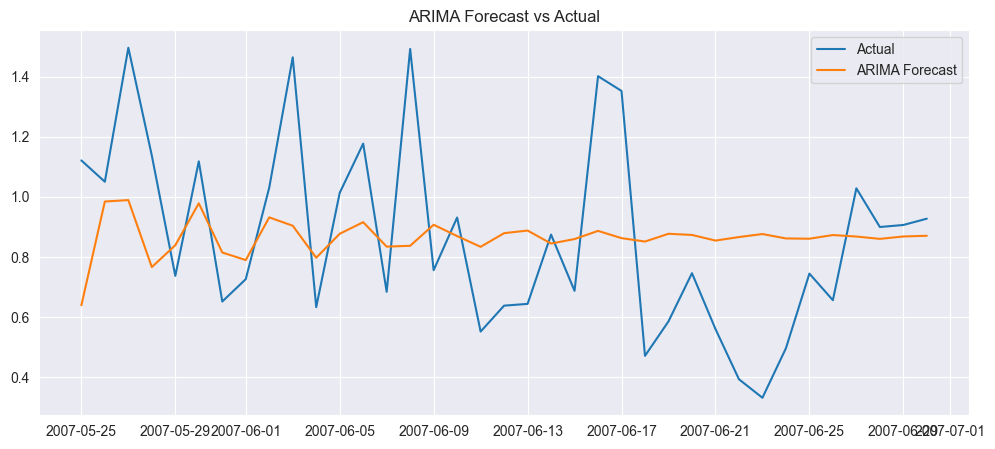

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, arima_pred, label='ARIMA Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

###  Model 2. Prophet

In [38]:
from prophet import Prophet

# Prepare data
prophet_df = daily_data.reset_index()
prophet_df.columns = ['ds', 'y']

train_prophet = prophet_df[:len(train)]
test_prophet = prophet_df[len(train):]

# Train model
model_prophet = Prophet()
model_prophet.fit(train_prophet)

# Forecast
future = model_prophet.make_future_dataframe(periods=len(test_prophet))
forecast = model_prophet.predict(future)

prophet_pred = forecast['yhat'][-len(test_prophet):].values

12:15:19 - cmdstanpy - INFO - Chain [1] start processing
12:15:19 - cmdstanpy - INFO - Chain [1] done processing


#### Evaluate Prophet

In [39]:
mae_prophet = mean_absolute_error(test_prophet['y'], prophet_pred)
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], prophet_pred))

print("Prophet MAE:", mae_prophet)
print("Prophet RMSE:", rmse_prophet)

Prophet MAE: 0.2584301806437173
Prophet RMSE: 0.33715821891491093


### Model 3. Plot Prophet

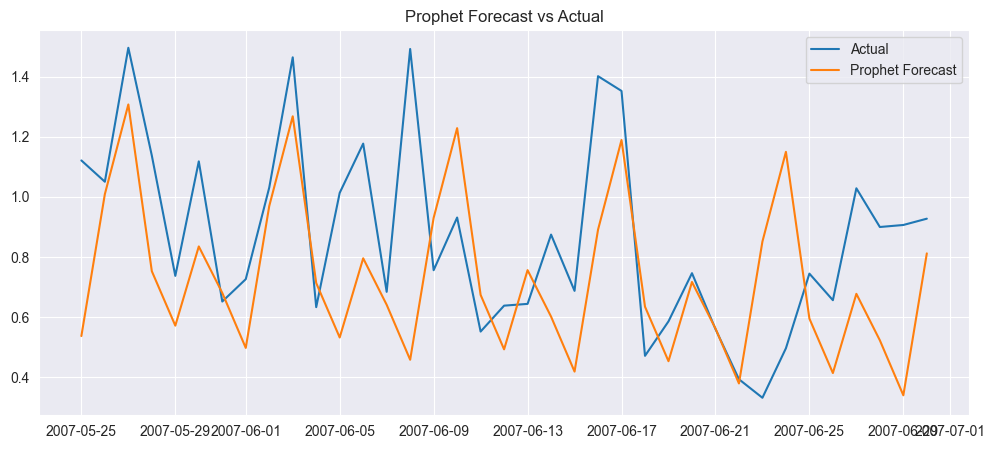

In [40]:
plt.figure(figsize=(12,5))
plt.plot(test_prophet['ds'], test_prophet['y'], label='Actual')
plt.plot(test_prophet['ds'], prophet_pred, label='Prophet Forecast')
plt.legend()
plt.title("Prophet Forecast vs Actual")
plt.show()

#### Evaluation:

In [41]:
mae_prophet = mean_absolute_error(test_prophet['y'], prophet_pred)
rmse_prophet = np.sqrt(mean_squared_error(test_prophet['y'], prophet_pred))

print("Prophet MAE:", mae_prophet)
print("Prophet RMSE:", rmse_prophet)

Prophet MAE: 0.2584301806437173
Prophet RMSE: 0.33715821891491093


### Model 3. XGBoost

In [43]:
df_features = daily_data.to_frame()

df_features['day'] = df_features.index.day
df_features['month'] = df_features.index.month
df_features['year'] = df_features.index.year
df_features['weekday'] = df_features.index.weekday
df_features['is_weekend'] = df_features['weekday'].apply(lambda x: 1 if x >= 5 else 0)

In [44]:
train_feat = df_features[:len(train)]
test_feat = df_features[len(train):]

X_train = train_feat.drop('Global_active_power', axis=1)
y_train = train_feat['Global_active_power']

X_test = test_feat.drop('Global_active_power', axis=1)
y_test = test_feat['Global_active_power']

### Check for NaNs or infinite values

In [51]:
import numpy as np
import pandas as pd

# Check y_train for problematic values
print("NaNs in y_train:", y_train.isna().sum())
print("Infinite values in y_train:", np.isinf(y_train).sum())
print("Max value in y_train:", y_train.max())
print("Min value in y_train:", y_train.min())

NaNs in y_train: 1
Infinite values in y_train: 0
Max value in y_train: 2.7984180555555556
Min value in y_train: 0.3484305555555556


#### Remove or fill NaNs

In [52]:
## remove or fill NaNS
mask = y_train.notna()  # True for rows without NaN
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

#### Check for infinity or very large numbers

In [53]:
# Remove infinite values
mask_inf = ~np.isinf(y_train_clean)
X_train_clean = X_train_clean[mask_inf]
y_train_clean = y_train_clean[mask_inf]

#### Refit the model

In [54]:
## Refit the model

from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train_clean, y_train_clean)

xgb_pred = model_xgb.predict(X_test)

In [56]:
print("NaNs in X_train:", X_train.isna().sum().sum())
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())

NaNs in X_train: 0
Infinite values in X_train: 0


#### Trian the model

In [57]:
## Train the model
from xgboost import XGBRegressor

# Model initialize
model_xgb = XGBRegressor()

# Fit on clean data
model_xgb.fit(X_train_clean, y_train_clean)

,"objective objective: str | xgboost.sklearn._SklObjWProto | typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]] | NoneSpecify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: float | typing.List[float] | NoneThe initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.List[xgboost.callback.TrainingCallback] | NoneList of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: float | NoneSubsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: float | NoneSubsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: float | NoneSubsample ratio of columns when constructing each tree.,None
,"device device: str | None.. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: int | None.. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: str | typing.List[str | typing.Callable] | typing.Callable | None.. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes from sklearn.metrics import mean_absolute_error X, y = load_diabetes(return_X_y=True) reg = xgb.XGBRegressor( tree_met

#### Generate the prediction

In [60]:
## prediction genenrte
# Test data pe predict
xgb_pred = model_xgb.predict(X_test)


#### Evaluate XGBoost

In [61]:
mae_xgb = mean_absolute_error(y_test, xgb_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost MAE: 0.2567967646490518
XGBoost RMSE: 0.34645950195444986


### Compare All Models

In [63]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['ARIMA', 'Prophet', 'XGBoost'],
    'MAE': [mae_arima, mae_prophet, mae_xgb],
    'RMSE': [rmse_arima, rmse_prophet, rmse_xgb]
})

print(results)

     Model       MAE      RMSE
0    ARIMA  0.248870  0.303866
1  Prophet  0.258430  0.337158
2  XGBoost  0.256797  0.346460


## 5. Plot Actual vs Forecasted

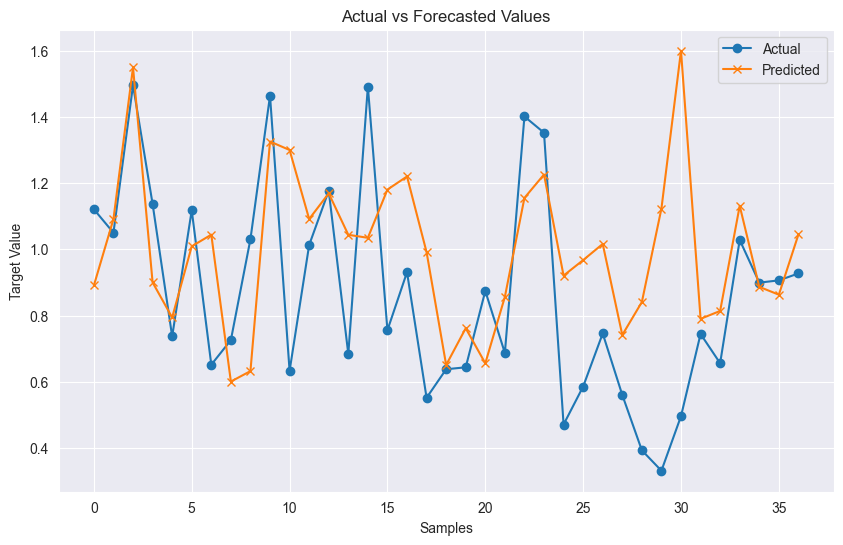

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Actual vs Predicted
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(xgb_pred, label='Predicted', marker='x')

plt.title("Actual vs Forecasted Values")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.legend()
plt.grid(True)
plt.show()

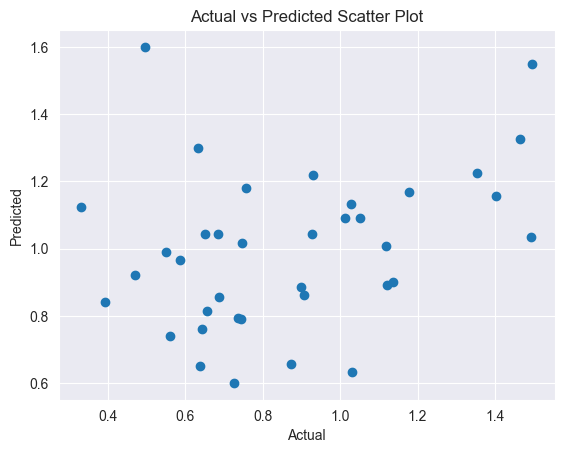

In [66]:
plt.scatter(y_test, xgb_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Scatter Plot")
plt.show()

### Final Conclusion

-Energy consumption shows seasonal patterns.

-ARIMA captures short-term trend.

-Prophet models seasonality well.

-XGBoost performs best due to time-based features.

-XGBoost achieved lowest RMSE, so it is best model.